# Sales Analysis

#### Import necessary libraries

In [4]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

#### Merge data from each month into one CSV

In [5]:
df=pd.read_csv('D:\Python Data Analysis\elect_sales\Sales_April_2019.csv')
files=[file for file in os.listdir('D:\Python Data Analysis\elect_sales')]
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('D:\Python Data Analysis\elect_sales'+file)
    all_months_data=pd.concat([all_months_data,df])
    all_months_data.to_csv('all_data.csv',index=False)

    

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python Data Analysis\\elect_salesall_data.csv'

In [6]:
# Assuming all CSV files are in the same directory and follow a similar naming convention, e.g., 'data_01.csv', 'data_02.csv', ..., 'data_12.csv'

# Step 1: Load each month's CSV data into a pandas DataFrame
file_paths = sorted(glob.glob('D:\Python Data Analysis\elect_sales\*_2019.csv'))  # List all CSV files in the directory
data_frames = []  # Initialize an empty list to store DataFrames

for file_path in file_paths:
    df = pd.read_csv(file_path)  # Read CSV file into a DataFrame
    data_frames.append(df)  # Append DataFrame to the list

# Step 2: Concatenate all the DataFrames into one DataFrame
concatenated_df = pd.concat(data_frames, ignore_index=True)

# Step 3: Save the concatenated DataFrame to a CSV file
concatenated_df.to_csv('concatenated_data.csv', index=False)

print("Concatenated CSV file saved successfully.")

Concatenated CSV file saved successfully.


In [7]:
concatenated_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
concatenated_df.to_csv('D:/Python Data Analysis/elect_sales/all_data.csv', index=False) #

#### Read in updated dataframe

In [9]:
all_data = pd.read_csv('D:/Python Data Analysis/elect_sales/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [10]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
all_data.shape

(186850, 6)

##### Drop rows of NAN

In [12]:
# Find NAN and delete, alternate way 
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##### Get rid of text in order date column

In [15]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [16]:
#all_data.loc['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
#all_data.loc['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

### Augment data with additional columns

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Add month column

In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### Add city column

In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [21]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
City                0
dtype: int64

In [22]:
all_data.dropna(inplace=True) #will drop the rows with the null values

In [23]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
City                0
dtype: int64

### Add Sale column

## Data Analysis

In [24]:
all_data.loc[:, 'Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.9
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


####  What was the best month for sales? How much was earned that month? 

In [25]:

 monthly_sales=all_data.groupby('Month')['Sales'].sum() 
monthly_sales

Month
1         1822256.73
2         2202022.42
3         2807100.38
4     3390670.240001
5     3152606.750001
6         2577802.26
7         2647775.76
8         2244467.88
9         2097560.13
10    3736726.880001
11    3199603.200001
12    4613443.340002
Name: Sales, dtype: object

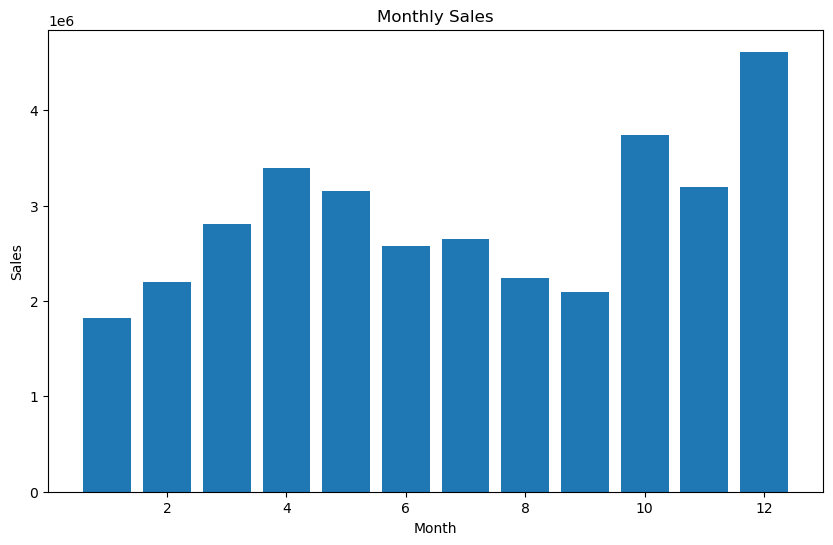

In [26]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='#1F77B4')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

The result shows that the last three months of the year have the highest sales

#### Which city generated the most revenue

In [27]:
city_sales=all_data.groupby('City')['Sales'].sum()
city_sales

City
Atlanta  (GA)              2795498.58
Austin  (TX)               1819581.75
Boston  (MA)           3661642.010001
Dallas  (TX)                2767975.4
Los Angeles  (CA)      5452570.800002
New York City  (NY)    4664317.430002
Portland  (ME)              449758.27
Portland  (OR)             1870732.34
San Francisco  (CA)    8262203.910004
Seattle  (WA)              2747755.48
Name: Sales, dtype: object

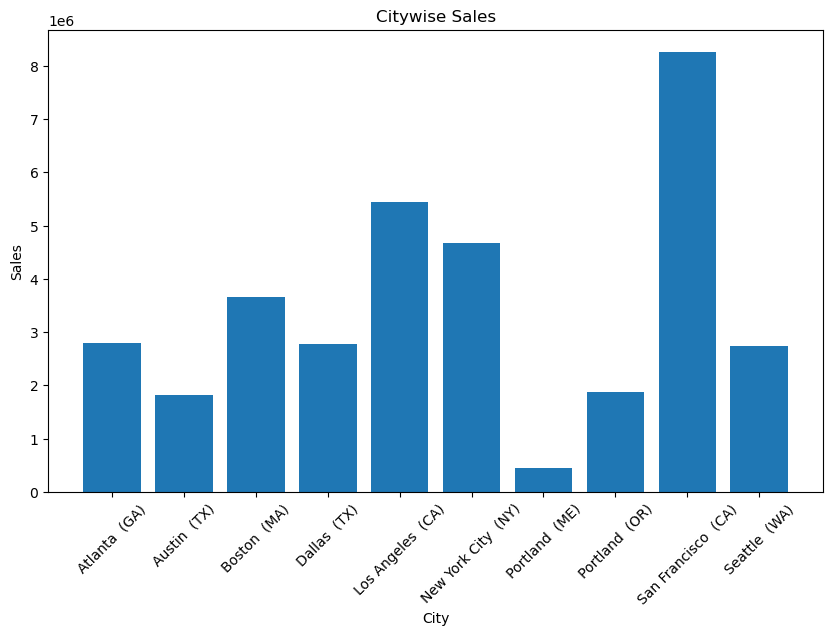

In [28]:
# Plot the bar plot to find the citywise sales
plt.figure(figsize=(10, 6))
plt.bar(city_sales.index, city_sales.values, color='#1F77B4')
plt.title('Citywise Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

The diagram above shows that San Francisco is on top of the list followed by Los Angeles and New York City

###  What is the best transaction time for the customers so that the advertisement can be displayed?

In [36]:
all_data.loc[:, 'Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')



In [37]:
# Add hour column
all_data.loc[:, 'Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.loc[:, 'Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.9,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.0,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


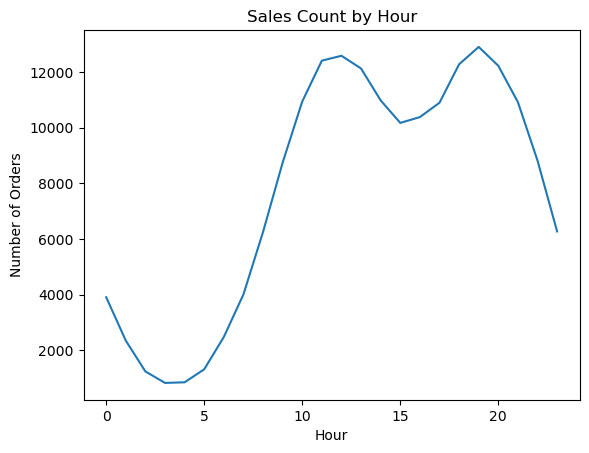

In [43]:

#plt.plot(hours,all_data.groupby(['Hour']).count)
sales_by_hour = all_data.groupby('Hour').count()['Sales']

plt.plot(sales_by_hour.index, sales_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Sales Count by Hour')
plt.show()

The best transaction time is 11:00 am in the morning and 7 pm in the evening